In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt 
#from autils import * 
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [8]:
!pip install fastbook import fastbook --upgrade
!pip install tensorflow --upgrade
from fastai.vision.all import * 
#from fastbook import * 
#fastbook.setup_book()
matplotlib.rc('image', cmap='Greys')

  Using cached fastbook-0.0.29-py3-none-any.whl.metadata (13 kB)
ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


# Zero or One? 
Here I am creating a model that can classify an image as a 0 or 1. 

MNIST is a database of images of handwritten digits by Yann Lecun and others. 

In [9]:
!pip install python-mnist numpy matplotlib

Tensorflow is a machine learning library. 

Keras is an open source library that provides a Python interface for neural networks. 

In [10]:
!pip install keras

In [11]:
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
#load the MNIST dataset 
(train_images, train_labels), (_,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
#filter only 0s and 1s 

#creates a boolean array where each element is True if the label is 0 OR 1. 
# | means or 
mask0 = (train_labels == 0)
mask1 = (train_labels == 1)

#This uses the boolean mask to select only images that have labels 0 and 1 
#train_images[mask]
images_zero = train_images[mask0]
images_one = train_images[mask1]
labels_zero = train_labels[mask0]
labels_one = train_labels[mask1]

Try to separate the ones and zeros

In [14]:
#Function to display an image 
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"label: {label}")
    plt.axis('off')
    plt.show()

Check that the zeros and ones are sorted correctly by displaying one of them

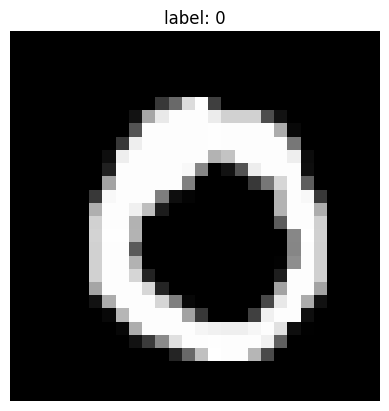

In [15]:
display_image(images_zero[5], labels_zero[5])

No way it took me an hour and a half to figure out how to download and load data from MNIST... lol 

Okay maybe I don't need to download all the images onto Kaggle. If I do that, then I will lose the pixel information because the images will be saved as a PNG. I need to convert these boolean arrays into tensors. 

In [16]:
im0 = images_zero[0]
print(im0[4:10])
print(tensor(im0[4:10]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252
   96 189 253 167   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  51 238 253 253 190 114 253 228
   47  79 255 168   0   0   0   0   0   0]]
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0, 

# What is Pandas? 
Pandas is an open source data analysis and manipulation tool, a way to work with data sets. 

# Data Frame 
A data frame is a data structure made up of rows and columns. 

# style.set_properties 
This helps visualize the dataframe. 

In [17]:
im0_tensor = tensor(im0)
df = pd.DataFrame(im0_tensor[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0
1,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0
2,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6
3,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122
4,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167
5,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168
6,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243
7,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252
8,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252
9,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252


In [18]:
for i in range(5):
    display_image(filtered_images[i], filtered_labels[i])

NameError: name 'filtered_images' is not defined

Convert the boolean arrays into a list of tensors. 

In [19]:
zero_tensors = [tensor(img) for img in images_zero]
one_tensors = [tensor(img) for img in images_one]

print(len(zero_tensors), len(one_tensors))

5923 6742


Check by printing out one of the images and displaying them. 

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,  64, 253, 255,  63,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  96, 205, 251, 253, 205, 111,   4,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<Axes: >

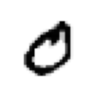

In [20]:
print(zero_tensors[1])
show_image(zero_tensors[1])

# Stochastic Gradient Descent 
* stochastic - choose a random sample of data, representing a single data point or a small batch of data points 
* gradient descent - an optimization algorithm to minimize the loss function by iteratively moving towards the steepest descent direction - like walking down a hill. 

In [26]:
model = Sequential ( 
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation = 'sigmoid'),
        Dense(15, activation = 'sigmoid'),
        Dense(1, activation = 'sigmoid'),
    
], name = 'my_model')

Now let's save the images. 